In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import json 
import struct
import random
import argparse
import seaborn as sns 


pwd=os.getcwd()
reports_path=os.path.join(pwd,"../../FSIM_logs/resnet50-bq1ch_from_resnet50_faulty_neurons_4/")
results_path=os.path.join(pwd,"../../FSIM_logs/try_number_one/analyze/reference")

fault_list_file=os.path.join(reports_path,"fault_list.csv")
fsim_report_file=os.path.join(reports_path,"fsim_report.csv")



fault_list= pd.read_csv(fault_list_file,index_col=[0]) 
fsim_report= pd.read_csv(fsim_report_file,index_col=[0]) 


full_report=pd.concat([fault_list,fsim_report],axis=1)




full_report['MRAD']=(100*abs(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
full_report['MRADk']=(100*abs(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])

full_report['AbsAD']=((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
full_report['AbsADk']=((full_report['fault_ACC@k']-full_report['gold_ACC@k']))

#full_report.to_csv(os.path.join(results_path,"full_report.csv"))




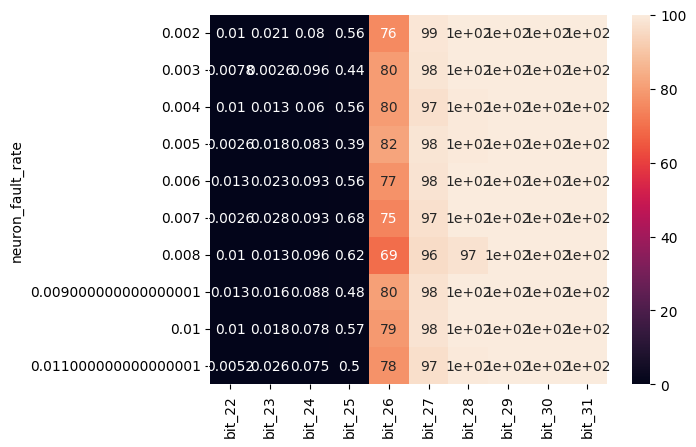

In [27]:


options=[0.002+0.001*i for i in range(0,10)]


new_Neuron_frame=pd.DataFrame()
new_Bit_frame=pd.DataFrame()

for Nfr in options:
    
    df_neuron_fault_rate=full_report.loc[abs(full_report['neuron_fault_rate']-Nfr)<0.00000005]
    new_row={'neuron_fault_rate':Nfr}
    for bit in range(5,32):
        bit_wise_data=df_neuron_fault_rate.loc[full_report['bit_faulty_pos']==bit]
        new_row[f"bit_{bit}"]=bit_wise_data[['MRAD']].mean()
        
    tmp_frame=pd.DataFrame(new_row)

    new_Bit_frame=pd.concat([new_Bit_frame,tmp_frame],ignore_index=True)

new_Bit_frame.index=new_Bit_frame['neuron_fault_rate']
new_Bit_frame=new_Bit_frame[['bit_22','bit_23','bit_24','bit_25','bit_26','bit_27','bit_28','bit_29','bit_30','bit_31']]




plt.figure()
sns.heatmap(new_Bit_frame,annot=True,vmin=0,vmax=100)
plt.show()





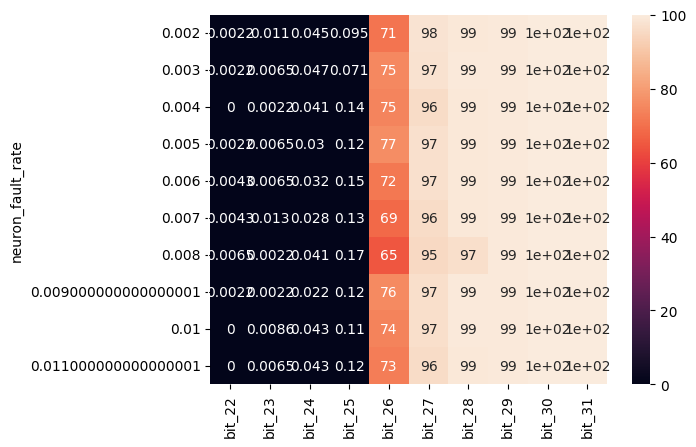

In [28]:


new_Neuron_frame=pd.DataFrame()
new_Bit_frame=pd.DataFrame()


for Nfr in options:
    
    df_neuron_fault_rate=full_report.loc[abs(full_report['neuron_fault_rate']-Nfr)<0.0005]
    # print(f"neuron rate = {Nfr}")
    # print(df_neuron_fault_rate[['MRAD','MRADk','AbsAD','AbsADk']].describe())
    new_row={'neuron_fault_rate':Nfr}
    for bit in range(5,32):
        bit_wise_data=df_neuron_fault_rate.loc[full_report['bit_faulty_pos']==bit]
        #print(f"bit pos = {bit}")
        #print(bit_wise_data[['MRAD','MRADk','AbsAD','AbsADk']].describe())
        new_row[f"bit_{bit}"]=bit_wise_data[['MRADk']].mean()
        
    tmp_frame=pd.DataFrame(new_row)
    new_Bit_frame=pd.concat([new_Bit_frame,tmp_frame],ignore_index=True)
    
#new_Bit_frame.to_csv(os.path.join(results_path,"MRADk_report_bit.csv"))

new_Bit_frame.index=new_Bit_frame['neuron_fault_rate']
new_Bit_frame=new_Bit_frame[['bit_22','bit_23','bit_24','bit_25','bit_26','bit_27','bit_28','bit_29','bit_30','bit_31']]




plt.figure()
sns.heatmap(new_Bit_frame,annot=True,vmin=0,vmax=100)
plt.show()